In [61]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/c/Users/VIKASH KAUSHIK/Desktop/arth_practice_by_vk/museums.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


np.random.seed(0) 

In [62]:

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind 
from scipy.stats import probplot 


import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [63]:
#read musesum csv
museums = pd.read_csv("museums.csv")

C:\Users\VIKASH KAUSHIK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,14,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [64]:
museums.shape

(33072, 25)

In [65]:
list(museums)

['Museum ID',
 'Museum Name',
 'Legal Name',
 'Alternate Name',
 'Museum Type',
 'Institution Name',
 'Street Address (Administrative Location)',
 'City (Administrative Location)',
 'State (Administrative Location)',
 'Zip Code (Administrative Location)',
 'Street Address (Physical Location)',
 'City (Physical Location)',
 'State (Physical Location)',
 'Zip Code (Physical Location)',
 'Phone Number',
 'Latitude',
 'Longitude',
 'Locale Code (NCES)',
 'County Code (FIPS)',
 'State Code (FIPS)',
 'Region Code (AAM)',
 'Employer ID Number',
 'Tax Period',
 'Income',
 'Revenue']

In [66]:
museums.sample(5)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
18148,8403100099,HAYDON,FRIENDS OF HAYDON,NaN,GENERAL MUSEUM,NaN,335 N 8TH ST STE A,LINCOLN,NE,68508,...,40.81663,-96.71028,1.0,109.0,31.0,5,200434109,NaN,NaN,NaN
9173,8401700511,LOCKWOOD PIONEER SCUBA DIVING,LOCKWOOD PIONEER SCUBA DIVING,NaN,HISTORY MUSEUM,NaN,7307 NORTH ALPINE,LOVES PARK,IL,61111,...,42.33019,-89.02850,2.0,201.0,17.0,4,300287146,201312.0,0.0,0.0
29616,8404900191,CENTRAL UTAH ART CENTER,CENTRAL UTAH ART CENTER,NaN,ART MUSEUM,NaN,175 E 200 S,SALT LAKE CTY,UT,84111,...,39.35890,-111.58716,3.0,39.0,49.0,6,870494985,201312.0,174330.0,176333.0
6582,8401200306,STILTSVILLE TRUST,STILTSVILLE TRUST INC,NaN,HISTORIC PRESERVATION,NaN,6105 GRANADA BLVD,CORAL GABLES,FL,33146,...,25.71298,-80.26764,2.0,86.0,12.0,3,200145949,201312.0,18715.0,18715.0
15759,8402900310,AUDRAIN COUNTY HISTORICAL SOCIETY,AUDRAIN COUNTY HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,501 S MULDROW ST,MEXICO,MO,65265,...,39.16940,-91.88867,3.0,7.0,29.0,4,430790174,201312.0,138474.0,121269.0


This seems like a very rich dataset with geo-spatial data as well as categorical data i.e. Museum Type and States

In [67]:
museums['Museum Type'].unique()

array(['HISTORY MUSEUM', 'ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER',
       'SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM',
       'HISTORIC PRESERVATION', 'GENERAL MUSEUM',
       'ZOO, AQUARIUM, OR WILDLIFE CONSERVATION', 'ART MUSEUM',
       "CHILDREN'S MUSEUM", 'NATURAL HISTORY MUSEUM'], dtype=object)

Text(0, 0.5, 'Count')

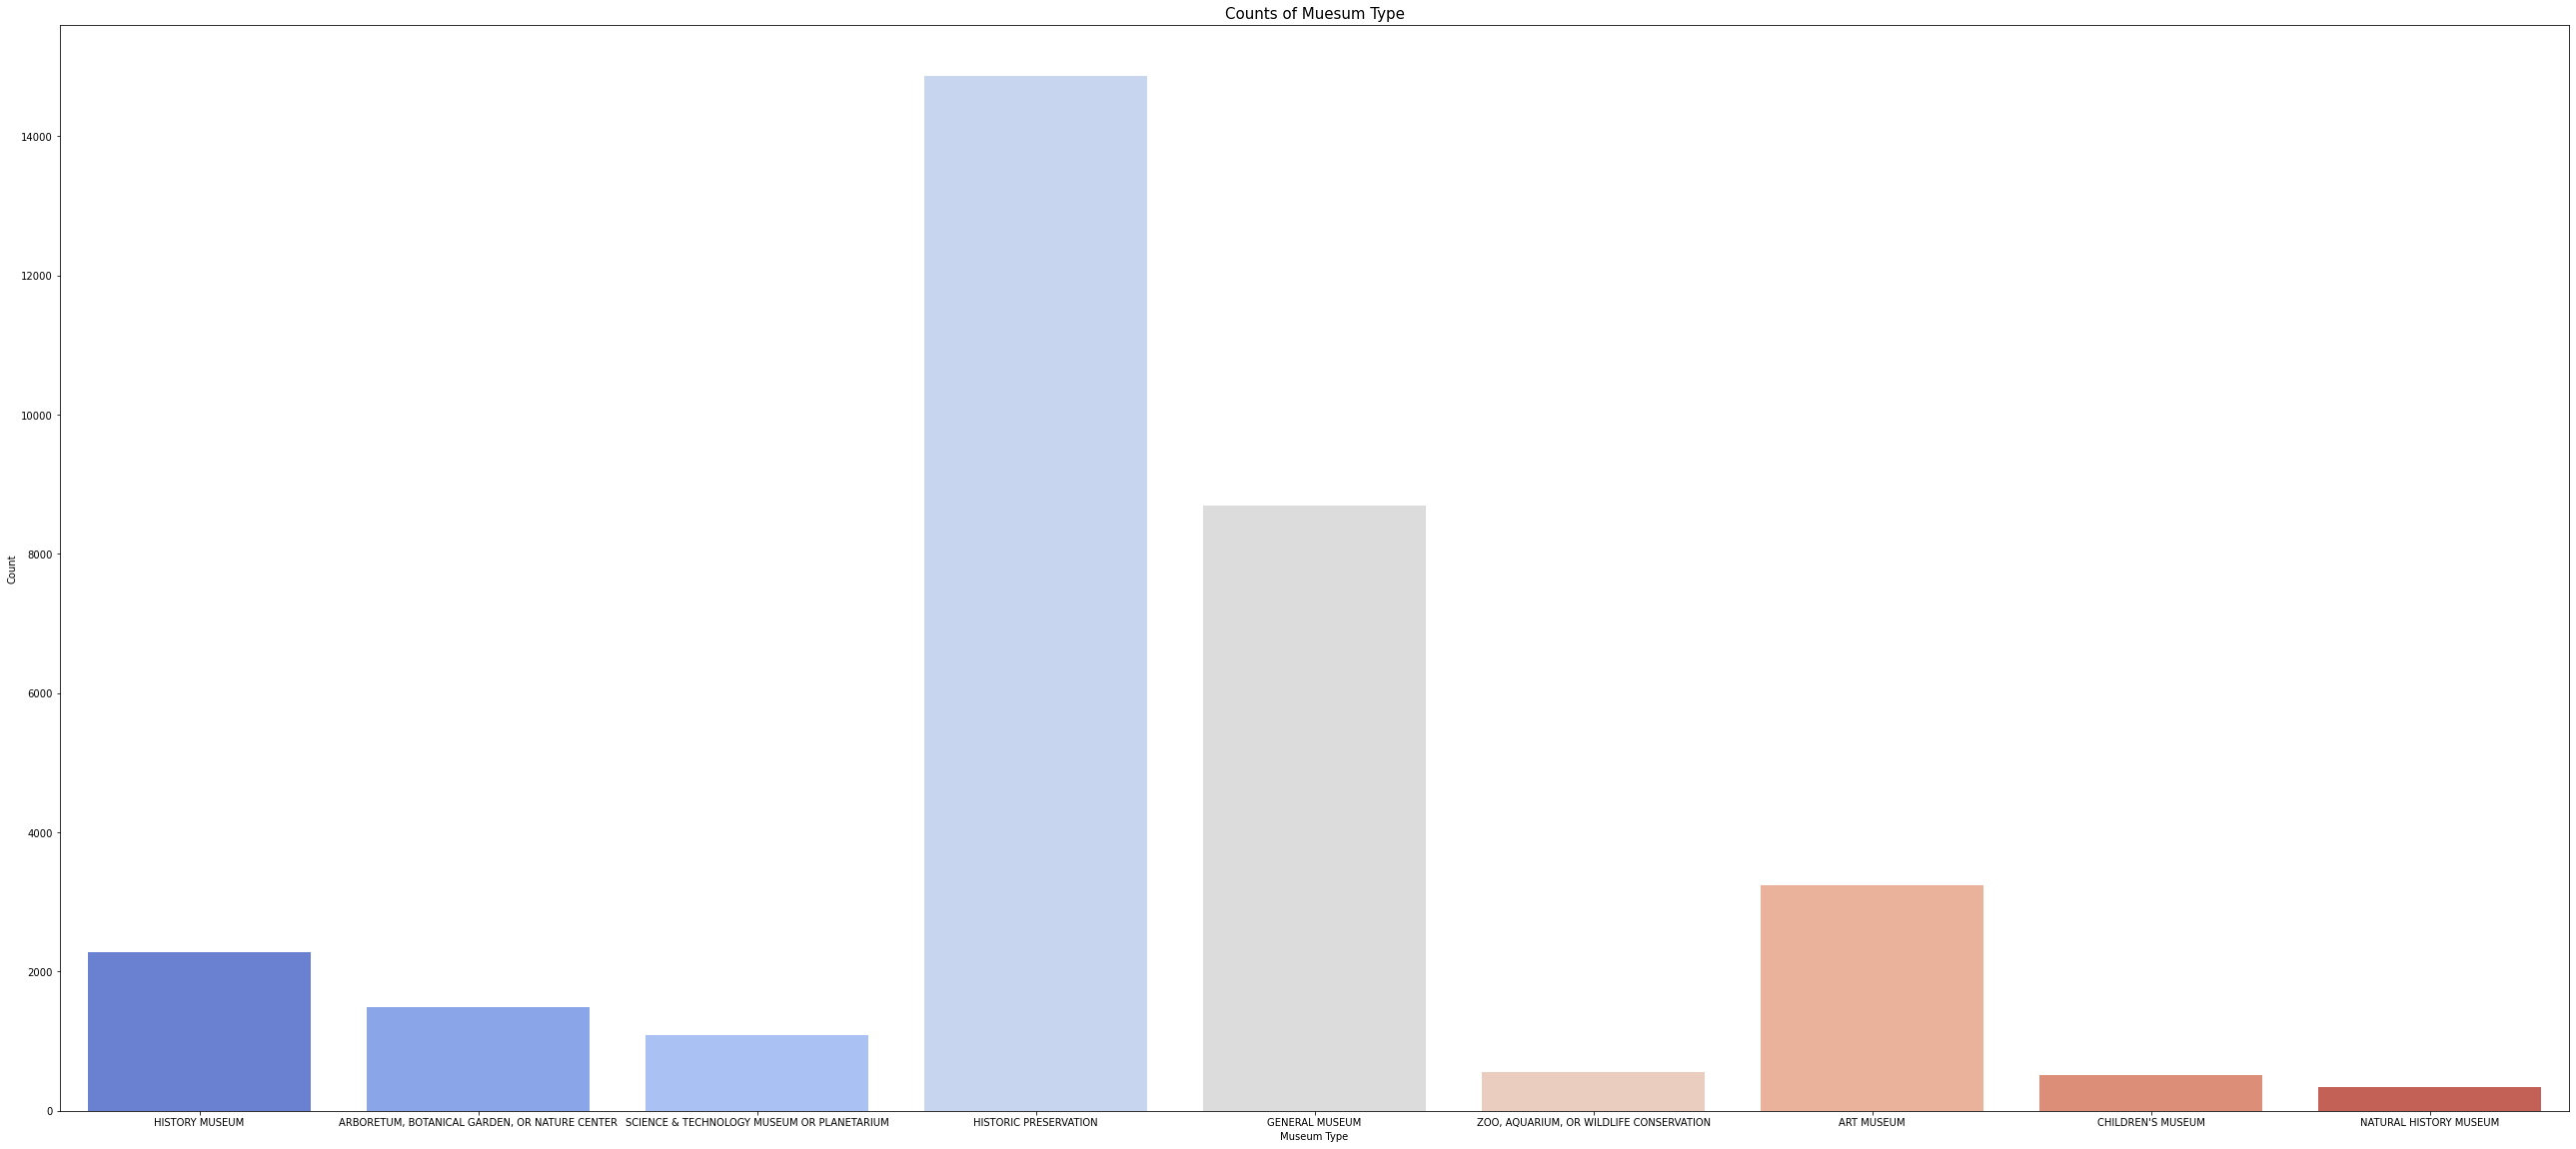

In [68]:
plt.figure(figsize=(45,20))
sns.countplot(data=museums, x='Museum Type', palette='coolwarm')
plt.title('Counts of Muesum Type', fontsize=15)
plt.xlabel('Museum Type')
plt.ylabel("Count")

We notice that Zoos are very low % compared to the rest of the museum types

In [69]:
museums['Museum Type'].value_counts() *100 / museums.shape[0] 

HISTORIC PRESERVATION                            44.935293
GENERAL MUSEUM                                   26.303217
ART MUSEUM                                        9.799831
HISTORY MUSEUM                                    6.906144
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER     4.487179
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM        3.268626
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION           1.705370
CHILDREN'S MUSEUM                                 1.548137
NATURAL HISTORY MUSEUM                            1.046202
Name: Museum Type, dtype: float64

Let's remove the revenue that is NaN so that we can have a idea - then visualise the spread of the revenue

In [70]:
museums = museums[['Museum Name','Museum Type', 'State (Administrative Location)', 'Income', 'Revenue']]

In [71]:

missing_values_count = museums.isnull().sum()


missing_values_count

Museum Name                            0
Museum Type                            0
State (Administrative Location)        0
Income                             10111
Revenue                            10782
dtype: int64

In [72]:

rows_with_na_dropped = museums.dropna()

print("Rows in original dataset: %d \n" % museums.shape[0])
print("Rows with na's dropped: %d" % rows_with_na_dropped.shape[0])

Rows in original dataset: 33072 

Rows with na's dropped: 22290


In [73]:
# remove all the rows that contain a missing value
museums = museums.dropna()

In [74]:
museums.shape

(22290, 5)

In [75]:
museums.isnull().sum()

Museum Name                        0
Museum Type                        0
State (Administrative Location)    0
Income                             0
Revenue                            0
dtype: int64

Let's plot to see the distribution of the prices of tickets

(array([2.2154e+04, 5.7000e+01, 1.9000e+01, 1.0000e+00, 3.0000e+00,
        1.4000e+01, 9.0000e+00, 4.0000e+00, 9.0000e+00, 2.0000e+01]),
 array([-2.12739300e+06,  5.82120292e+08,  1.16636798e+09,  1.75061566e+09,
         2.33486335e+09,  2.91911103e+09,  3.50335872e+09,  4.08760640e+09,
         4.67185409e+09,  5.25610177e+09,  5.84034946e+09]),
 <a list of 10 Patch objects>)

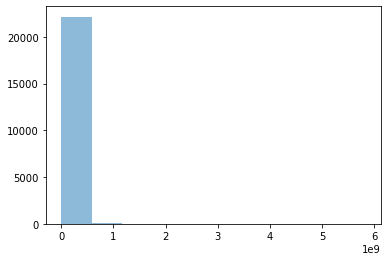

In [76]:
plt.hist(museums['Revenue'], alpha=0.5, label='cold')

It looks like marjority are under 1*10^9

((array([-4.00433345, -3.78948145, -3.67197105, ...,  3.67197105,
          3.78948145,  4.00433345]),
  array([-2.12739300e+06, -1.79970900e+06, -1.72367400e+06, ...,
          5.84034946e+09,  5.84034946e+09,  5.84034946e+09])),
 (58395585.647811264, 20976047.05693138, 0.23493830761332615))

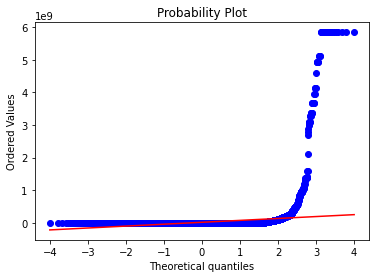

In [77]:
probplot(museums["Revenue"], dist="norm", plot=pylab)

Notice it's not very normally distributed mainly because there is a lot higher revenue that are outliers.

Let's remove the outliers and setting the boundaries

In [78]:
museumsreduced = museums[museums.Revenue < 500000]
museumsreduced = museums[museums.Revenue > 0]

entries_removed = museums.shape[0] - museumsreduced.shape[0]

print("Rows in dataset with nulls removed: %d \n" % museums.shape[0])

print("Removed museums with revenue that are under 500000: %d \n" % entries_removed)

Rows in dataset with nulls removed: 22290 

Removed museums with revenue that are under 500000: 10823 



In [79]:
museums = museums[museums.Revenue < 500000]
museums = museums[museums.Revenue > 0]

print("Current number of rows: %d \n" % museums.shape[0])

Current number of rows: 7914 



(array([2888., 1745., 1011.,  646.,  474.,  350.,  253.,  199.,  182.,
         166.]),
 array([2.000000e+00, 4.996140e+04, 9.992080e+04, 1.498802e+05,
        1.998396e+05, 2.497990e+05, 2.997584e+05, 3.497178e+05,
        3.996772e+05, 4.496366e+05, 4.995960e+05]),
 <a list of 10 Patch objects>)

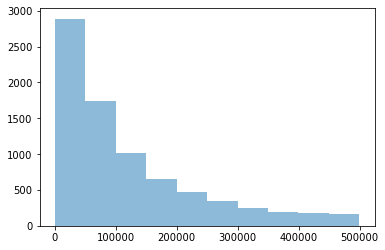

In [80]:
plt.hist(museums['Revenue'], alpha=0.5, label='cold')

((array([-3.75238212, -3.52394266, -3.39837219, ...,  3.39837219,
          3.52394266,  3.75238212]),
  array([2.00000e+00, 3.00000e+00, 3.00000e+00, ..., 4.99061e+05,
         4.99321e+05, 4.99596e+05])),
 (107903.02632611747, 119383.68789486984, 0.9180680929259722))

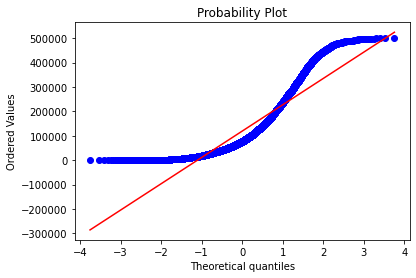

In [81]:
probplot(museums["Revenue"], dist="norm", plot=pylab)

This looks more normally distributed - but not perfect - we can take log of them or use z value but let's go as it is for now.

In [82]:
museums.shape

(7914, 5)

In [83]:
museums.head()

,Museum Name,Museum Type,State (Administrative Location),Income,Revenue
6,ALASKA JEWISH MUSEUM,GENERAL MUSEUM,AK,2658938.0,34374.0
7,ALASKA LIGHTHOUSE ASSOCIATION,HISTORIC PRESERVATION,AK,16500.0,16500.0
9,ALASKA MINING HALL OF FAME FOUNDATION,HISTORY MUSEUM,AK,184295.0,31393.0
14,ALASKA STATE MUSEUM,GENERAL MUSEUM,AK,182675.0,129192.0
16,ALASKA TROOPER MUSEUM,GENERAL MUSEUM,AK,769702.0,221807.0


In [84]:
zoos = museums[museums['Museum Type'] =="ZOO, AQUARIUM, OR WILDLIFE CONSERVATION"]
notzoos =museums[museums['Museum Type']!="ZOO, AQUARIUM, OR WILDLIFE CONSERVATION"]
ttest_ind(zoos.Revenue,notzoos.Revenue,equal_var=False)

Ttest_indResult(statistic=2.328088976576806, pvalue=0.022337754345297216)

If we set out alpha to be 0.05, which means we accept the data to be 1 in 20 chance to be incorrect by chance.

Typically alpha phreshold is set to be 0.05 and sometimes 0.01 or lower for medical research and medicine becuase of the tolerance to accept false negatives and false positives.


TL;TR:

The p- value is under 0.05 which shows there is significant that zoo are different price to other museum types.